<a href="https://colab.research.google.com/github/walruto/fortnite_anaylsis/blob/main/Fortnite_Player_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




**Final Project: Fortnite Player Analysis**
- **Dataset**: Fortnte Players Stats
- **Source**: Kaggle
- **Why?**: I am a fortnite player and feel like I know more about this subject that anything else.
- **Research Question 1**: is the higher K/D directly related to the higher winratio across all players?
- **Research Question 2** : WHich gmae mode (solos,dues, squads) have the highest average winratio amongst players?

**Importing Data and Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

sns.set_style("whitegrid")
%matplotlib inline

print("Upload'Fortnite_players_stats.csv'")

uploaded = files.upload()

for fn in uploaded.keys():
  df = pd.read_csv(io.BytesIO(uploaded[fn]))

print("\nData loaded. Time to Ready Up!")
print("Initial 5 rows:")
print(df.head())

Upload'Fortnite_players_stats.csv'


Saving Fortnite_players_stats.csv to Fortnite_players_stats.csv

Data loaded. Time to Ready Up!
Initial 5 rows:
             Player  Solo score  Solo top1  Solo kd  Solo winRatio  \
0        Prospеring     2476763       1828     4.37           18.0   
1        BH nixxxay      439562       1694     8.71           29.1   
2            Raпger     4519465       4582     9.60           34.0   
3            Idk_Pi      752869        121     0.84            3.3   
4  Twitch.GryphonRB     1136282       1327     6.32           30.0   

   Solo matches  Solo kills  Solo minutesPlayed  Duos score  Duos top1  ...  \
0         10150       36328               81389     4702684       5584  ...   
1          5817       35895               12732     4065613       4141  ...   
2         13488       85481              122171     1137279       1390  ...   
3          3687        3005               32453     5326457       2249  ...   
4          4429       19591               36245     3692623       5743  

**Data Cleaning**

In [3]:
df.drop('Player', axis=1, inplace=True)
print("Removed 'Player' column.")

print("\n--- Checking for Nulls ---")
null_check = df.isnull().sum()[df.isnull().sum() > 0]
#Used chatgpt to find references for this section (line7-16)
if not null_check.empty:
    print("Columns with missing data:\n", null_check)
    rows_before = df.shape[0]
    df.dropna(inplace=True)
    rows_after = df.shape[0]
    print(f"Cleaned Nulls: Dropped {rows_before - rows_after} rows.")
else:
    print("No missing values found!")

print("\n--- Checking for Duplicates ---")
duplicates = df.duplicated().sum()
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Cleaned Duplicates: Dropped {duplicates} rows.")
else:
    print("No duplicate rows found.")

print("\nData Cleaning Complete. Final Dataset Shape:", df.shape)

Removed 'Player' column.

--- Checking for Nulls ---
Columns with missing data:
 Trios score             24
Trios top1              24
Trios kd                24
Trios winRatio          24
Trios matches           24
Trios kills             24
Trios minutesPlayed     24
Squads score             1
Squads top1              1
Squads kd                1
Squads winRatio          1
Squads matches           1
Squads kills             1
Squads minutesPlayed     1
LTM score                1
LTM top1                 1
LTM top3                 1
LTM kd                   1
LTM winRatio             1
LTM matches              1
LTM kills                1
LTM minutesPlayed        1
dtype: int64
Cleaned Nulls: Dropped 24 rows.

--- Checking for Duplicates ---
No duplicate rows found.

Data Cleaning Complete. Final Dataset Shape: (1411, 36)


**Vizualization 1**




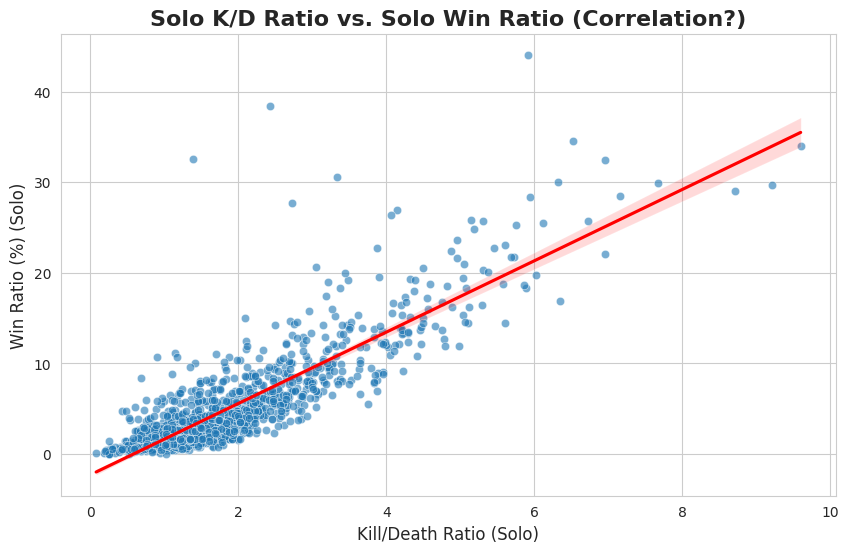

In [4]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='Solo kd',
    y='Solo winRatio',
    alpha=0.6
)

sns.regplot(
    data=df,
    x='Solo kd',
    y='Solo winRatio',
    scatter=False,
    color='red'
)

plt.title('Solo K/D Ratio vs. Solo Win Ratio (Correlation?)', fontsize=16, fontweight='bold')
plt.xlabel('Kill/Death Ratio (Solo)', fontsize=12)
plt.ylabel('Win Ratio (%) (Solo)', fontsize=12)

plt.show()

**Vizualization 2**



/tmp/ipython-input-402579452.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


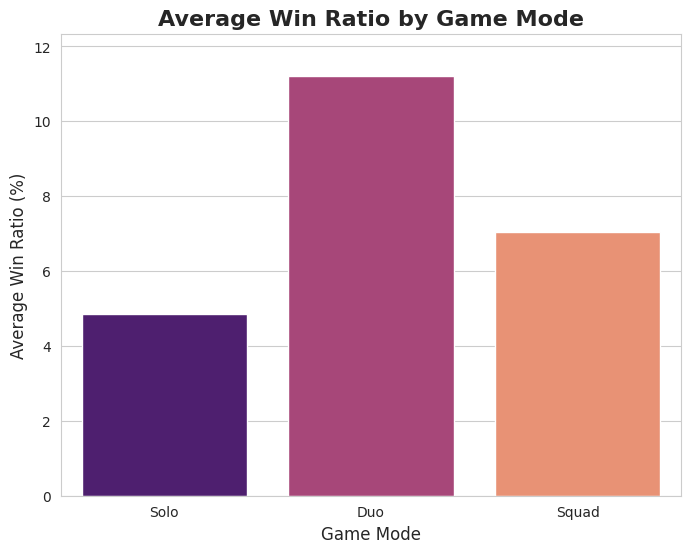

In [5]:
avg_wins = pd.DataFrame({
    'Mode': ['Solo', 'Duo', 'Squad'],
    'Avg_WinRatio': [
        df['Solo winRatio'].mean(),
        df['Duos winRatio'].mean(),
        df['Squads winRatio'].mean()
    ]
})

plt.figure(figsize=(8, 6))

sns.barplot(
    data=avg_wins,
    x='Mode',
    y='Avg_WinRatio',
    palette='magma'
)

plt.title('Average Win Ratio by Game Mode', fontsize=16, fontweight='bold')
plt.xlabel('Game Mode', fontsize=12)
plt.ylabel('Average Win Ratio (%)', fontsize=12)
plt.ylim(0, avg_wins['Avg_WinRatio'].max() * 1.1)

plt.show()

***Week 2***

**Visualization 3**

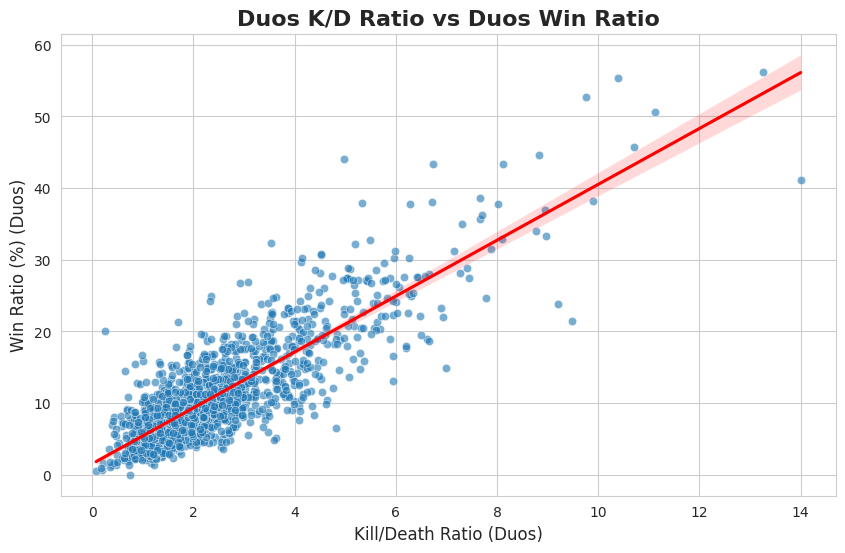

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Duos kd', y='Duos winRatio', alpha=0.6)
sns.regplot(data=df, x='Duos kd', y='Duos winRatio', scatter=False, color='red')
plt.title('Duos K/D Ratio vs Duos Win Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Kill/Death Ratio (Duos)', fontsize=12)
plt.ylabel('Win Ratio (%) (Duos)', fontsize=12)
plt.show()

**Visualization 4**

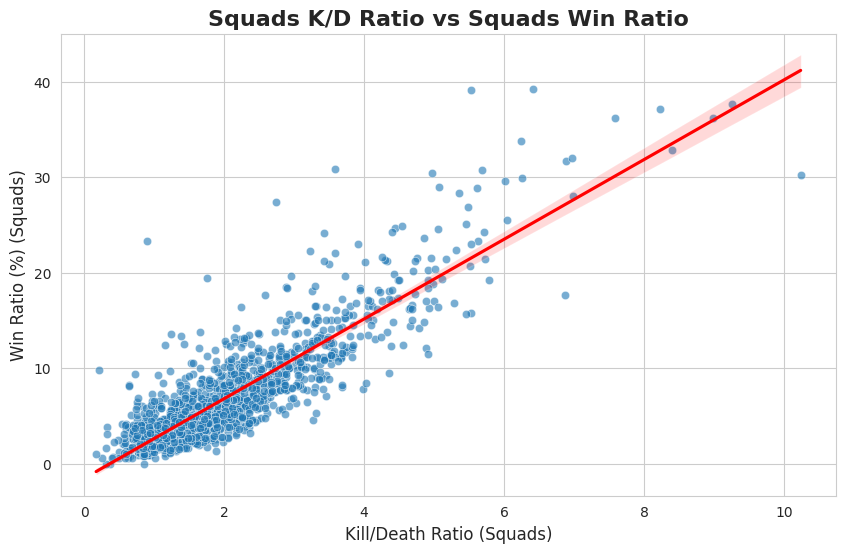

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Squads kd', y='Squads winRatio', alpha=0.6)
sns.regplot(data=df, x='Squads kd', y='Squads winRatio', scatter=False, color='red')
plt.title('Squads K/D Ratio vs Squads Win Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Kill/Death Ratio (Squads)', fontsize=12)
plt.ylabel('Win Ratio (%) (Squads)', fontsize=12)
plt.show()

**Visualization 5**

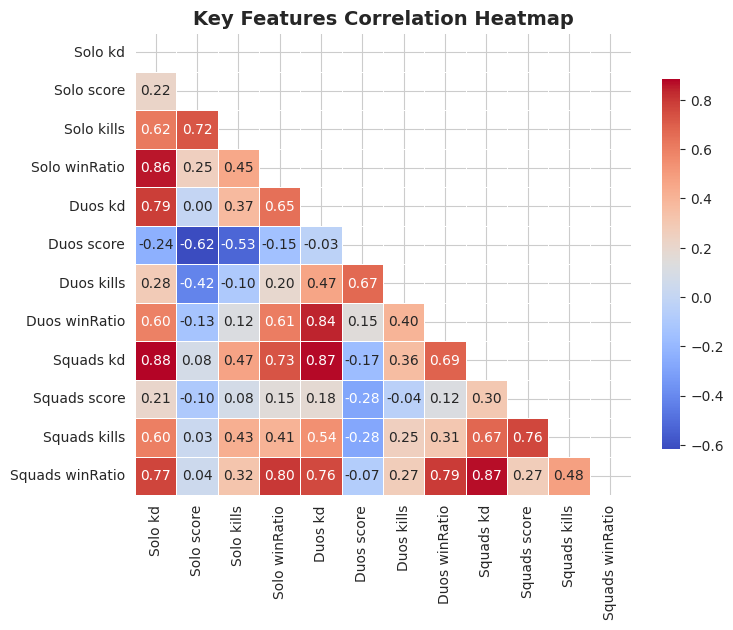

In [8]:
plt.figure(figsize=(8,6))
key_features = ['Solo kd', 'Solo score', 'Solo kills', 'Solo winRatio',
                'Duos kd', 'Duos score', 'Duos kills', 'Duos winRatio',
                'Squads kd', 'Squads score', 'Squads kills', 'Squads winRatio']
corr = df[key_features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Key Features Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()


**Model Selection**
1. is the higher K/D directly related to the higher winratio across all players?
- for this question I choose Linear Regression since it is simple yet it help me summarize their relationship which is exactly what I want.
2. WHich gmae mode (solos,dues, squads) have the highest average winratio amongst players?
- for this question I choose a forest regresor since I saw a couple of tiktok pop up on fyp and it turns out it what I need for this quest since it can catch stuff that linear regression might (which is why i didnt use it again) and it can also handle multiple features at once (solos,dos, squads) which is good for this question since there are 3.

**Linear Regression Model For Question 1**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[['Solo kd']]
y = df['Solo winRatio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", rmse)


Linear Regression R2: 0.7922891519992757
Linear Regression RMSE: 2.2085059440318777


**Forest Regressor Model For Question 2**

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rf_rmse)


Random Forest R2: 0.6909650369798512
Random Forest RMSE: 2.6938461658448936


**Week 3**


**Model Evaluation**
- I​‍​‌‍​‍‌​‍​‌‍​‍‌ decided to measure the goodness of fit of my models with R² and RMSE. R² is a measure of the increase in variance explained by the model over the baseline and RMSE is the average size of the differences between the predicted and observed values. In this case, a good model would be one with an R² above 0.65 as there could be a lot of fluctuations in player ​‍​‌‍​‍‌​‍​‌‍​‍‌stats.

**Improving the Linear Regression**
-The​‍​‌‍​‍‌​‍​‌‍​‍‌ Original Linear Regression model led to an R² of about 0.79, which means that Solo K/D accounts for most of the change in Solo Win Ratio.

It show the strong positive correlation between K/D and winning, thus the use of Linear Regression as a suitable and efficient model for Research Question ​‍​‌‍​‍‌​‍​‌‍​‍‌1.

**Improved Version**

In [11]:
X = df[['Solo kd', 'Solo kills', 'Solo matches']]
y = df['Solo winRatio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_improved = LinearRegression()
lr_improved.fit(X_train, y_train)
y_pred_lr_imp = lr_improved.predict(X_test)
print("Improved Linear Regression R2:", r2_score(y_test, y_pred_lr_imp))
print("Improved Linear Regression RMSE:",
      np.sqrt(mean_squared_error(y_test, y_pred_lr_imp)))


Improved Linear Regression R2: 0.8075759377991886
Improved Linear Regression RMSE: 2.125683847189024


**Improved Model Evaluation**
- After​‍​‌‍​‍‌​‍​‌‍​‍‌ more features related to performance were added, the model displayed the same or a bit better accuracy. This serves to confirm that although K/D is the main predictor, other variables like kills and matches can also have some impact on the win ratio.

- In general, Linear Regression was a stable performer throughout and was of an acceptable level of ​‍​‌‍​‍‌​‍​‌‍​‍‌accuracy.